# <div align="center">How the backpropagation algorithm works</div>
---------------------------------------------------------------------
you can Find me on Github:
> ###### [ GitHub](https://github.com/lev1khachatryan)

# A Step by Step Backpropagation Example

For this tutorial, we’re going to use a neural network with two inputs, two hidden neurons, two output neurons. Additionally, the hidden and output neurons will include a bias.

Here’s the basic structure:

<img src="asset/2.1/BP_Example/1.png" />

In order to have some numbers to work with, here are the initial weights, the biases, and training inputs/outputs:

<img src="asset/2.1/BP_Example/2.png" />

The goal of backpropagation is to optimize the weights so that the neural network can learn how to correctly map arbitrary inputs to outputs.

For the rest of this tutorial we’re going to work with a single training set: given inputs 0.05 and 0.10, we want the neural network to output 0.01 and 0.99.


# The Forward Pass
To begin, lets see what the neural network currently predicts given the weights and biases above and inputs of 0.05 and 0.10. To do this we’ll feed those inputs forward though the network.

We figure out the total net input to each hidden layer neuron, squash the total net input using an activation function (here we use the logistic function), then repeat the process with the output layer neurons.

Here’s how we calculate the total net input for h_1:

<img src="asset/2.1/BP_Example/3.png" />

<img src="asset/2.1/BP_Example/4.png" />

We then squash it using the logistic function to get the output of h_1:

<img src="asset/2.1/BP_Example/5.png" />

Carrying out the same process for h_2 we get:

<img src="asset/2.1/BP_Example/6.png" />

We repeat this process for the output layer neurons, using the output from the hidden layer neurons as inputs.

Here’s the output for o_1:

<img src="asset/2.1/BP_Example/7.png" />

<img src="asset/2.1/BP_Example/8.png" />

<img src="asset/2.1/BP_Example/9.png" />

And carrying out the same process for o_2 we get:

<img src="asset/2.1/BP_Example/10.png" />

# Calculating the Total Error
We can now calculate the error for each output neuron using the squared error function and sum them to get the total error:

<img src="asset/2.1/BP_Example/11.png" />

For example, the target output for o_1 is 0.01 but the neural network output 0.75136507, therefore its error is:

<img src="asset/2.1/BP_Example/12.png" />

Repeating this process for o_2 (remembering that the target is 0.99) we get:

<img src="asset/2.1/BP_Example/13.png" />

The total error for the neural network is the sum of these errors:

<img src="asset/2.1/BP_Example/14.png" />



# The Backwards Pass
Our goal with backpropagation is to update each of the weights in the network so that they cause the actual output to be closer the target output, thereby minimizing the error for each output neuron and the network as a whole.

## Output Layer
Consider w_5. We want to know how much a change in w_5 affects the total error, aka $\frac{\partial E_{total}}{\partial w_{5}}$.

<img src="asset/2.1/BP_Example/1_Blue.png" />

By applying the chain rule we know that:

<img src="asset/2.1/BP_Example/15.png" />

Visually, here’s what we’re doing:

<img src="asset/2.1/BP_Example/16.png" />

We need to figure out each piece in this equation.

First, how much does the total error change with respect to the output?

<img src="asset/2.1/BP_Example/17.png" />

<img src="asset/2.1/BP_Example/18.png" />

<img src="asset/2.1/BP_Example/19.png" />

<img src="asset/2.1/BP_Example/2_Blue.png" />


Next, how much does the output of o_1 change with respect to its total net input?

The partial derivative of the logistic function is the output multiplied by 1 minus the output:

<img src="asset/2.1/BP_Example/20.png" />

<img src="asset/2.1/BP_Example/21.png" />

Finally, how much does the total net input of o1 change with respect to w_5?

<img src="asset/2.1/BP_Example/22.png" />

<img src="asset/2.1/BP_Example/23.png" />

Putting it all together:

<img src="asset/2.1/BP_Example/24.png" />

<img src="asset/2.1/BP_Example/25.png" />

<img src="asset/2.1/BP_Example/3_Blue.png" />

To decrease the error, we then subtract this value from the current weight (optionally multiplied by some learning rate, eta, which we’ll set to 0.5):

<img src="asset/2.1/BP_Example/26.png" />

We can repeat this process to get the new weights w_6, w_7, and w_8:

<img src="asset/2.1/BP_Example/27.png" />

<img src="asset/2.1/BP_Example/28.png" />

<img src="asset/2.1/BP_Example/29.png" />



We perform the actual updates in the neural network after we have the new weights leading into the hidden layer neurons (ie, we use the original weights, not the updated weights, when we continue the backpropagation algorithm below).

## Hidden Layer
Next, we’ll continue the backwards pass by calculating new values for w_1, w_2, w_3, and w_4.

Big picture, here’s what we need to figure out:

<img src="asset/2.1/BP_Example/30.png" />

Visually:

<img src="asset/2.1/BP_Example/31.png" />



We’re going to use a similar process as we did for the output layer, but slightly different to account for the fact that the output of each hidden layer neuron contributes to the output (and therefore error) of multiple output neurons. We know that out_{h1} affects both out_{o1} and out_{o2} therefore the $\frac{\partial E_{total}}{\partial out_{h1}}$ needs to take into consideration its effect on the both output neurons:

<img src="asset/2.1/BP_Example/32.png" />

Starting with:

<img src="asset/2.1/BP_Example/33.png" />

<img src="asset/2.1/BP_Example/34.png" />

We can calculate $\frac{\partial E_{o1}}{\partial net_{o1}}$ using values we calculated earlier:

<img src="asset/2.1/BP_Example/35.png" />



And $\frac{\partial net_{o1}}{\partial out_{h1}}$ is equal to w_5:

<img src="asset/2.1/BP_Example/36.png" />

<img src="asset/2.1/BP_Example/37.png" />

Plugging them in:

<img src="asset/2.1/BP_Example/38.png" />

Following the same process for $\frac{\partial E_{o2}}{\partial out_{h1}}$, we get:

<img src="asset/2.1/BP_Example/39.png" />

Therefore

<img src="asset/2.1/BP_Example/40.png" />

Now that we have $\frac{\partial E_{total}}{\partial out_{h1}}$, we need to figure out $\frac{\partial out_{h1}}{\partial net_{h1}}$ and then $\frac{\partial net_{h1}}{\partial w}$ for each weight:

<img src="asset/2.1/BP_Example/41.png" />

<img src="asset/2.1/BP_Example/42.png" />

We calculate the partial derivative of the total net input to h_1 with respect to w_1 the same as we did for the output neuron:

<img src="asset/2.1/BP_Example/43.png" />

<img src="asset/2.1/BP_Example/44.png" />

Putting it all together:

<img src="asset/2.1/BP_Example/45.png" />

<img src="asset/2.1/BP_Example/46.png" />

<img src="asset/2.1/BP_Example/4_Blue.png" />

We can now update w_1:
 
<img src="asset/2.1/BP_Example/47.png" />

Repeating this for w_2, w_3, and w_4

<img src="asset/2.1/BP_Example/48.png" />

<img src="asset/2.1/BP_Example/49.png" />

<img src="asset/2.1/BP_Example/50.png" />

Finally, we’ve updated all of our weights! When we fed forward the 0.05 and 0.1 inputs originally, the error on the network was 0.298371109. After this first round of backpropagation, the total error is now down to 0.291027924. It might not seem like much, but after repeating this process 10,000 times, for example, the error plummets to 0.0000351085. At this point, when we feed forward 0.05 and 0.1, the two outputs neurons generate 0.015912196 (vs 0.01 target) and 0.984065734 (vs 0.99 target).

In the last chapter we saw how neural networks can learn their weights and biases using the gradient descent algorithm. There was, however, a gap in our explanation: we didn't discuss how to compute the gradient of the cost function. That's quite a gap! In this chapter I'll explain a fast algorithm for computing such gradients, an algorithm known as backpropagation.

The backpropagation algorithm was originally introduced in the 1970s, but its importance wasn't fully appreciated until a famous 1986 paper by David Rumelhart, Geoffrey Hinton, and Ronald Williams. That paper describes several neural networks where backpropagation works far faster than earlier approaches to learning, making it possible to use neural nets to solve problems which had previously been insoluble. Today, the backpropagation algorithm is the workhorse of learning in neural networks.

This chapter is more mathematically involved than the rest of the book. If you're not crazy about mathematics you may be tempted to skip the chapter, and to treat backpropagation as a black box whose details you're willing to ignore. Why take the time to study those details?

The reason, of course, is understanding. At the heart of backpropagation is an expression for the partial derivative ∂C/∂w of the cost function C with respect to any weight w (or bias b) in the network. The expression tells us how quickly the cost changes when we change the weights and biases. And while the expression is somewhat complex, it also has a beauty to it, with each element having a natural, intuitive interpretation. And so backpropagation isn't just a fast algorithm for learning. It actually gives us detailed insights into how changing the weights and biases changes the overall behaviour of the network. That's well worth studying in detail.

With that said, if you want to skim the chapter, or jump straight to the next chapter, that's fine. I've written the rest of the book to be accessible even if you treat backpropagation as a black box. There are, of course, points later in the book where I refer back to results from this chapter. But at those points you should still be able to understand the main conclusions, even if you don't follow all the reasoning.

# <div align="center">A fast matrix-based approach to computing the output from a neural network</div>
---------------------------------------------------------------------

Before discussing backpropagation, let's warm up with a fast matrix-based algorithm to compute the output from a neural network. We actually already briefly saw this algorithm near the end of the last chapter, but I described it quickly, so it's worth revisiting in detail. In particular, this is a good way of getting comfortable with the notation used in backpropagation, in a familiar context.

Let's begin with a notation which lets us refer to weights in the network in an unambiguous way. We'll use $w^l_{j, k}$ to denote the weight for the connection from the k-th neuron in the (l−1)-th layer to the j-th neuron in the l-th layer. So, for example, the diagram below shows the weight on a connection from the fourth neuron in the second layer to the second neuron in the third layer of a network:

<img src="asset/2.1/1.png" />

This notation is cumbersome at first, and it does take some work to master. But with a little effort you'll find the notation becomes easy and natural. One quirk of the notation is the ordering of the j and k indices. You might think that it makes more sense to use j to refer to the input neuron, and k to the output neuron, not vice versa, as is actually done. I'll explain the reason for this quirk below.

We use a similar notation for the network's biases and activations. Explicitly, we use $b^l_{j}$ for the bias of the jth neuron in the lth layer. And we use $a^l_{j}$ for the activation of the j-th neuron in the l-th layer. The following diagram shows examples of these notations in use:

<img src="asset/2.1/2.png" />

With these notations, the activation $a^l_{j}$ of the j-th neuron in the l-th layer is related to the activations in the (l−1)-th layer by the equation (compare Equation (4) and surrounding discussion in the last chapter)

<img src="asset/2.1/3.png" />

where the sum is over all neurons k in the (l−1)-th layer. To rewrite this expression in a matrix form we define a weight matrix $w^l$ for each layer, l. The entries of the weight matrix $w^l$ are just the weights connecting to the l-th layer of neurons, that is, the entry in the j-th row and k-th column is $w^l_{j, k}$. Similarly, for each layer l we define a bias vector, $b^l$. You can probably guess how this works - the components of the bias vector are just the values $b^l_{j}$, one component for each neuron in the l-th layer. And finally, we define an activation vector $a^l$ whose components are the activations $a^l_{j}$.

The last ingredient we need to rewrite (23) in a matrix form is the idea of vectorizing a function such as $σ$. We met vectorization briefly in the last chapter, but to recap, the idea is that we want to apply a function such as σ to every element in a vector v. We use the obvious notation σ(v) to denote this kind of elementwise application of a function. That is, the components of σ(v) are just $σ(v)_{j}=σ(v_{j})$. As an example, if we have the function $f(x)=x^2$ then the vectorized form of f has the effect

<img src="asset/2.1/4.png" />

that is, the vectorized f just squares every element of the vector.

With these notations in mind, Equation (23) can be rewritten in the beautiful and compact vectorized form

<img src="asset/2.1/5.png" />

This expression gives us a much more global way of thinking about how the activations in one layer relate to activations in the previous layer: we just apply the weight matrix to the activations, then add the bias vector, and finally apply the $σ$ function. That global view is often easier and more succinct (and involves fewer indices!) than the neuron-by-neuron view we've taken to now. Think of it as a way of escaping index hell, while remaining precise about what's going on. The expression is also useful in practice, because most matrix libraries provide fast ways of implementing matrix multiplication, vector addition, and vectorization. Indeed, the code in the last chapter made implicit use of this expression to compute the behaviour of the network.

When using Equation (25) to compute $a^l$, we compute the intermediate quantity $z^l≡w^l a^(l−1) + b^l$ along the way. This quantity turns out to be useful enough to be worth naming: ***we call $z^l$ the weighted input to the neurons in layer l***. We'll make considerable use of the weighted input $z^l$ later in the chapter. Equation (25) is sometimes written in terms of the weighted input, as $a^l=σ(z^l)$. It's also worth noting that $z^l$ has components $z^l_{j}=∑_{k}w^l_{j, k} a^(l−1)_{k}+ b^l_{j}$, that is, $z^l_{j}$ is just the weighted input to the activation function for neuron j in layer l.

# <div align="center">The two assumptions we need about the cost function</div>
---------------------------------------------------------------------

The goal of backpropagation is to compute the partial derivatives $∂C/∂w$ and $∂C/∂b$ of the cost function $C$ with respect to any weight w or bias b in the network. For backpropagation to work we need to make ***two main assumptions about the form of the cost function***. Before stating those assumptions, though, it's useful to have an example cost function in mind. We'll use the quadratic cost function from last chapter (c.f. Equation (6)). In the notation of the last section, the quadratic cost has the form

<img src="asset/2.1/6.png" />

where: n is the total number of training examples; the sum is over individual training examples, x; $y=y(x)$ is the corresponding desired output; L denotes the number of layers in the network; and $a^L=a^L(x)$ is the vector of activations output from the network when x is input.

Okay, so what assumptions do we need to make about our cost function, C, in order that backpropagation can be applied? The ***first assumption*** we need is that the ***cost function can be written as an average $C=1/n∑_{x}C_{x}$ over cost functions $C_{x}$ for individual training examples, x***. This is the case for the quadratic cost function, where the cost for a single training example is $C_{x}=1/2 ∥y−a^L∥^2$. This assumption will also hold true for all the other cost functions we'll meet in this book.

The reason we need this assumption is because what backpropagation actually lets us do is compute the partial derivatives $∂C_{x}/∂w and ∂C_{x}/∂b$ for a single training example. We then recover ∂C/∂w and ∂C/∂b by averaging over training examples. In fact, with this assumption in mind, we'll suppose the training example x has been fixed, and drop the x subscript, writing the cost C_{x} as C. We'll eventually put the x back in, but for now it's a notational nuisance that is better left implicit.

The ***second assumption*** we make about the cost is that ***it can be written as a function of the outputs from the neural network:***

<img src="asset/2.1/7.png" />

For example, the ***quadratic cost function satisfies this requirement***, since the quadratic cost for a single training example x may be written as

<img src="asset/2.1/8.png" />

and thus is a function of the output activations. Of course, this cost function also depends on the desired output y, and you may wonder why we're not regarding the cost also as a function of y. Remember, though, that the input training example x is fixed, and so the output y is also a fixed parameter. In particular, it's not something we can modify by changing the weights and biases in any way, i.e., it's not something which the neural network learns. And so it makes sense to regard C as a function of the output activations aL alone, with y merely a parameter that helps define that function.

# <div align="center">The Hadamard product, s⊙t</div>
---------------------------------------------------------------------

The backpropagation algorithm is based on common linear algebraic operations - things like vector addition, multiplying a vector by a matrix, and so on. But one of the operations is a little less commonly used. In particular, suppose s and t are two vectors of the same dimension. Then we use s⊙t to denote the elementwise product of the two vectors. Thus the components of s⊙t are just $(s⊙t)_{j}=s_{j}t_{j}$. As an example,

<img src="asset/2.1/9.png" />

This kind of elementwise multiplication is sometimes called the ***Hadamard product*** or Schur product. We'll refer to it as the Hadamard product. Good matrix libraries usually provide fast implementations of the Hadamard product, and that comes in handy when implementing backpropagation.


# <div align="center">The four fundamental equations behind backpropagation</div>
---------------------------------------------------------------------

***Backpropagation is about understanding how changing the weights and biases in a network changes the cost function***. Ultimately, this means computing the partial derivatives ∂C/∂$w^l_{j, k}$ and ∂C/∂$b^l_{j}$. But to compute those, we first introduce an intermediate quantity, $δ^l_{j}$, which we call the ***error in the jth neuron in the lth layer***. Backpropagation will give us a procedure to compute the error $δ^l_{j}$, and then will relate $δ^l_{j}$ to ∂C/∂$w^l_{j, k}$ and ∂C/∂$b^l_{j}$.

To understand how the error is defined, imagine there is a demon in our neural network:

<img src="asset/2.1/10.png" />

The demon sits at the jth neuron in layer l. As the input to the neuron comes in, the demon messes with the neuron's operation. It adds a little change $Δz^l_{j}$ to the neuron's weighted input, so that instead of outputting $σ(z^l_{j})$, the neuron instead outputs σ($z^l_{j} + Δz^l_{j}$). This change propagates through later layers in the network, finally causing the overall cost to change by an amount ∂C/∂$z^l_{j}$ * $Δz^l_{j}$.

Now, this demon is a good demon, and is trying to help you improve the cost, i.e., they're trying to find a Δ$z^l_{j}$ which makes the cost smaller. Suppose ∂C∂$z^l_{j}$ has a large value (either positive or negative). Then the demon can lower the cost quite a bit by choosing Δ$z^l_{j}$ to have the opposite sign to ∂C∂$z^l_{j}$. By contrast, if ∂C∂$z^l_{j}$ is close to zero, then the demon can't improve the cost much at all by perturbing the weighted input $z^l_{j}$. So far as the demon can tell, the neuron is already pretty near optimal. And so there's a heuristic sense in which ∂C/∂z^l j is a measure of the error in the neuron.

Motivated by this story, we define the error $δ^l_{j}$ of neuron j in layer l by:

<img src="asset/2.1/11.png" />

As per our usual conventions, we use $δ^l$ to denote the vector of errors associated with layer l. Backpropagation will give us a way of computing $δ^l$ for every layer, and then relating those errors to the quantities of real interest, ∂C/∂$w^l_{j,k}$ and ∂C/∂$b^l_{j}$.

You might wonder why the demon is changing the weighted input $z^l_{j}$. Surely it'd be more natural to imagine the demon changing the output activation $a^l_{j}$, with the result that we'd be using ∂C/∂$a^l_{j}$ as our measure of error. In fact, if you do this things work out quite similarly to the discussion below. But it turns out to make the presentation of backpropagation a little more algebraically complicated. So we'll stick with $δ^l_{j}$=∂C∂$z^l_{j}$ as our measure of error

***Plan of attack:*** Backpropagation is based around ***four fundamental equations***. Together, those equations give us a way of computing both the error $δ^l$ and the gradient of the cost function. I state the four equations below. Be warned, though: you shouldn't expect to instantaneously assimilate the equations. Such an expectation will lead to disappointment. In fact, the backpropagation equations are so rich that understanding them well requires considerable time and patience as you gradually delve deeper into the equations. The good news is that such patience is repaid many times over. And so the discussion in this section is merely a beginning, helping you on the way to a thorough understanding of the equations.

Here's a preview of the ways we'll delve more deeply into the equations later in the chapter: I'll give a short proof of the equations, which helps explain why they are true; we'll restate the equations in algorithmic form as pseudocode, and see how the pseudocode can be implemented as real, running Python code; and, in the final section of the chapter, we'll develop an intuitive picture of what the backpropagation equations mean, and how someone might discover them from scratch. Along the way we'll return repeatedly to the four fundamental equations, and as you deepen your understanding those equations will come to seem comfortable and, perhaps, even beautiful and natural.

# An equation for the error in the output layer, $δ^L$:

The components of $δ^L$ are given by

<img src="asset/2.1/12.png" />

This is a very natural expression. The first term on the right, ∂C/∂$a^L_{j}$, just measures how fast the cost is changing as a function of the jth output activation. If, for example, C doesn't depend much on a particular output neuron, j, then $δ^L_{j}$ will be small, which is what we'd expect. The second term on the right, σ′($z^L_{j}$), measures how fast the activation function σ is changing at z$^L_{j}$.

Notice that everything in (BP1) is easily computed. In particular, we compute z$^L_{j}$ while computing the behaviour of the network, and it's only a small additional overhead to compute σ′(z$^L_{j}$). The exact form of ∂C/∂a$^L_{j}$ will, of course, depend on the form of the cost function. However, provided the cost function is known there should be little trouble computing ∂C/∂a$^L_{j}$. For example, if we're using the quadratic cost function then $C=1/2∑_{j}(y_{j}−a^L_{j})^2$, and so 

∂C/∂a$^L_{j}$=(a$^L_{j}−y_{j}$), which obviously is easily computable.

Equation (BP1) is a componentwise expression for $δ^L$. It's a perfectly good expression, but not the matrix-based form we want for backpropagation. However, it's easy to rewrite the equation in a matrix-based form, as

<img src="asset/2.1/13.png" />

Here, $∇_{a}C$ is defined to be a vector whose components are the partial derivatives ∂C/∂a$^L_{j}$. You can think of $∇_{a}C$ as expressing the rate of change of C with respect to the output activations. It's easy to see that Equations (BP1a) and (BP1) are equivalent, and for that reason from now on we'll use (BP1) interchangeably to refer to both equations. As an example, in the case of the quadratic cost we have $∇_{a}C$=($a^L$−y), and so the fully matrix-based form of (BP1) becomes

<img src="asset/2.1/14.png" />

As you can see, everything in this expression has a nice vector form, and is easily computed using a library such as Numpy.



# An equation for the error $δ^l$ in terms of the error in the next layer, $δ^(l+1)$:

In particular

<img src="asset/2.1/15.png" />

This equation appears complicated, but each element has a nice interpretation. Suppose we know the error $δ^(l+1)$ at the (l+1)-th layer. When we apply the transpose weight matrix, $(w^(l+1))^T$, we can think intuitively of this as moving the error backward through the network, giving us some sort of measure of the error at the output of the l-th layer. We then take the Hadamard product ⊙σ′($z^l$). This moves the error backward through the activation function in layer l, giving us the error $δ^l$ in the weighted input to layer l.

By combining (BP2) with (BP1) we can compute the error $δ^l$ for any layer in the network. We start by using (BP1) to compute $δ^L$, then apply Equation (BP2) to compute $δ^(L-1)$, then Equation (BP2) again to compute $δ^(L-2)$, and so on, all the way back through the network.

# An equation for the rate of change of the cost with respect to any bias in the network: 

In particular:

<img src="asset/2.1/16.png" />

That is, the error $δ^l_{j}$ is exactly equal to the rate of change $∂C/∂b^l_{j}$. This is great news, since (BP1) and (BP2) have already told us how to compute $δ^l_{j}$. We can rewrite (BP3) in shorthand as

<img src="asset/2.1/17.png" />


# An equation for the rate of change of the cost with respect to any weight in the network:

In particular:

<img src="asset/2.1/18.png" />

The equation can be rewritten in a less index-heavy notation as

<img src="asset/2.1/19.png" />

where it's understood that $a_{in}$ is the activation of the neuron input to the weight w, and $δ_{out}$ is the error of the neuron output from the weight w. Zooming in to look at just the weight w, and the two neurons connected by that weight, we can depict this as:

<img src="asset/2.1/20.png" />

A nice consequence of Equation (32) is that when the activation $a_{in}$ is small, $a_{in}$≈0, the gradient term ∂C/∂w will also tend to be small. In this case, we'll say the ***weight learns slowly***, meaning that it's not changing much during gradient descent. In other words, one consequence of (BP4) is that weights output from low-activation neurons learn slowly.

There are other insights along these lines which can be obtained from (BP1)-(BP4). Let's start by looking at the output layer. Consider the term $σ′(z^L_{j})$ in (BP1). Recall from the graph of the sigmoid function in the last chapter that the σ function becomes very flat when $σ(z^L_{j})$ is approximately 0 or 1. When this occurs we will have $σ′(z^L_{j})$≈0. And so the lesson is that a weight in the final layer will learn slowly if the output neuron is either low activation (≈0) or high activation (≈1). In this case it's common to say the output neuron has ***saturated*** and, as a result, the weight has stopped learning (or is learning slowly). Similar remarks hold also for the biases of output neuron.

Summing up, we've learnt that a weight will learn slowly if either the input neuron is low-activation, or if the output neuron has saturated, i.e., is either high- or low-activation.

<img src="asset/2.1/21.png" />



# <div align="center">Problem</div>
---------------------------------------------------------------------

<img src="asset/2.1/22.png" />

<img src="asset/2.1/23.png" />

Transforming ***BP1***: $\delta^L = \sigma'(z^L) \odot \nabla_a C$ can be rewritten as $\delta^L = \Sigma'(z^L) \nabla_a C$
This is actually a particular case of the following, which stems from the definition of matrix multiplication:

If $X = 
\begin{pmatrix}x_1 \\ x_2 \\ \ldots \\ x_n \end{pmatrix}$ and $Y = 
\begin{pmatrix}y_1 \\ y_2 \\ \ldots \\ y_n \end{pmatrix}$ then $X \odot Y = Y \odot X = \sum\limits_{k=1}^n x_k y_k = \begin{pmatrix}x_1 & 0 & & \ldots\\0 & x_2 & & \\ & & \ddots & \\ \ldots & & & x_n\end{pmatrix} \begin{pmatrix}y_1 \\ y_2 \\ \ldots \\ y_n \end{pmatrix}$

Transforming ***BP2***: this is the exact same reasoning.

Now to prove the last equation, we only have to repeatedly replace $\delta^{l+1}$ in $\delta^l = \Sigma'(z^l) (w^{l+1})^T \delta^{l+1}$ with $\Sigma'(z^{l+1}) (w^{l+2})^T \delta^{l+2}$ until reaching $l+1 = L$, then using $\delta^L = \sigma'(z^L) \odot \nabla_a C$ to finally get:

$$\begin{eqnarray}
    \delta^l = \Sigma'(z^l) (w^{l+1})^T \ldots \Sigma'(z^{L-1}) (w^L)^T 
    \Sigma'(z^L) \nabla_a C
\end{eqnarray}$$

# <div align="center">Proof of the four fundamental equations</div>
---------------------------------------------------------------------

<img src="asset/2.1/21.png" />

Let's begin with Equation (BP1), which gives an expression for the output error, δL. To prove this equation, recall that by definition

<img src="asset/2.1/24.png" />

Applying the chain rule, we can re-express the partial derivative above in terms of partial derivatives with respect to the output activations,

<img src="asset/2.1/25.png" />

where the sum is over all neurons k in the output layer. Of course, the output activation $a^L_{k}$ of the kth neuron depends only on the weighted input $z^L_{j}$ for the jth neuron when k=j. And so ∂$a^L_{k}$/∂$z^L_{j}$ vanishes when k≠j. As a result we can simplify the previous equation to

<img src="asset/2.1/26.png" />

Recalling that $a^L_{j}$=σ($z^L_{j}$) the second term on the right can be written as σ′($z^L_{j}$), and the equation becomes

<img src="asset/2.1/27.png" />

which is just (BP1), in component form.

Next, we'll prove (BP2), which gives an equation for the error $δ^l$ in terms of the error in the next layer, $δ^(l+1)$. To do this, we want to rewrite $δ^l_{j}$=∂C/∂$z^l_{j}$ in terms of $δ^(l+1)_{k}$=∂C/∂$z^(l+1)_{k}$. We can do this using the chain rule,

<img src="asset/2.1/28.png" />

where in the last line we have interchanged the two terms on the right-hand side, and substituted the definition of $δ^(l+1)_{k}$. To evaluate the first term on the last line, note that

<img src="asset/2.1/29.png" />

Differentiating, we obtain

<img src="asset/2.1/30.png" />

Substituting back into (42) we obtain

<img src="asset/2.1/31.png" />

This is just (BP2) written in component form

BP3: $\frac{\partial C}{\partial b^l_j} = \delta^l_j$
By definition, $\delta_j^l = \frac{\partial C}{\partial z_j^l}$.

Applying the chain rule, we can write this in terms of partial derivatives with respect to the biases of every neuron in layer $l$:

$$\delta_j^l = \sum_k \frac{\partial C}{\partial b_k^l} \frac{\partial b_k^l}{\partial z_j^l}$$
.

Since $b_k^l$ depends only on $z_k^l$, all terms in this sum are null, except the one where $k = j$:

$$\delta_j^l = \frac{\partial C}{\partial b_j^l} \frac{\partial b_j^l}{\partial z_j^l}$$
.

Now since $z^l_j = \sum_k w^l_{jk} a^{l-1}_k+b^l_j$, and therefore $b^l_j = z^l_j - \sum_k w^l_{jk} a^{l-1}_k$, we have $\frac{\partial b_j^l}{\partial z_j^l} = 1$.

This gives us BP3:

$$\frac{\partial C}{\partial b^l_j} = \delta^l_j$$

BP4: $\frac{\partial C}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j$
As previously, $w_{jk}^l$ only affects only $z_j^l$, so let's drop the sum right away and write the chain rule as:

$$\frac{\partial C}{\partial w_{jk}^l} = \frac{\partial C}{\partial z_j^l} \frac{\partial z_j^l}{\partial w_{jk}^l}$$
By definition, $\frac{\partial C}{\partial z_j^l}$ is $\delta_j^l$ and since $z^l_j = \sum_k w^l_{jk} a^{l-1}_k+b^l_j$, we have $\frac{\partial z_j^l}{\partial w_{jk}^l} = a_k^{l-1}$.

And so we have BP4:

$$\frac{\partial C}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j$$

# The backpropagation algorithm

The backpropagation equations provide us with a way of computing the gradient of the cost function. Let's explicitly write this out in the form of an algorithm:

<img src="asset/2.1/32.png" />

# Exercises

***Backpropagation with a single modified neuron***

Suppose we modify a single neuron in a feedforward network so that the output from the neuron is given by $f(∑_{j}w_{j}x_{j}+b)$, where f is some function other than the sigmoid. How should we modify the backpropagation algorithm in this case?

For this we have to recognize which parts of the backpropagation equation actually depend on the precise form of the activation function, and which parts don't.

Let's say our modified neuron is the $i^{th}$ neuron in the $l^{th}$ layer.

In the step 2 (feedforward), we will compute everything as before, except for $a_i^l = f(z_i^l)$.

Now:

if the modified neuron is in the output layer ($l = L$), we will have to separate the different error calculations in step 3, and compute $\delta_i^L = \frac{\partial C}{\partial a_i^L} f'(z_i^L)$ for our modified neuron, and $\delta_j^L = \frac{\partial C}{\partial a_j^L} \sigma'(z_j^L)$ for the other neurons. The other steps will be unchanged.

if the modified neuron is inside the network ($l < L$), steps 3 and 5 will be unchanged, but at step 4 we will have to compute things differently for our neuron. It will help here to consider the component form of BP2, which is the equation used in this step (below, the not yet modified form):

$$\delta^l_j = \sum_k w^{l+1}_{kj}  \delta^{l+1}_k \sigma'(z^l_j)$$
But this time, we will have for our modified neuron:

$$\delta^l_i = \sum_k w^{l+1}_{ki}  \delta^{l+1}_k f'(z^l_i)$$
And for the other neurons:

$$\delta^l_j = \sum_k w^{l+1}_{kj}  \delta^{l+1}_k \sigma'(z^l_j)$$

***Backpropagation with linear neurons***

Suppose we replace the usual non-linear σ function with σ(z)=z throughout the network. Rewrite the backpropagation algorithm for this case.

With the activation function $\sigma(z) = z$, we have $\sigma'(z) = 1$ and $a_j^l = z_j^l$, which simplifies the backpropagation algorithm:

In step 3, the output error vector is simply:
$$\delta^{L} = \nabla_a C$$
In step 4, the error vector is simply:
$$\delta^{l} = (w^{l+1})^T \delta^{l+1}$$

As I've described it above, the backpropagation algorithm computes the gradient of the cost function for a single training example, C=Cx. In practice, it's common to combine backpropagation with a learning algorithm such as stochastic gradient descent, in which we compute the gradient for many training examples. In particular, given a mini-batch of m training examples, the following algorithm applies a gradient descent learning step based on that mini-batch:

<img src="asset/2.1/33.png" />

# The code for backpropagation

Having understood backpropagation in the abstract, we can now understand the code used in the last chapter to implement backpropagation. Recall from that chapter that the code was contained in the update_mini_batch and backprop methods of the Network class. The code for these methods is a direct translation of the algorithm described above. In particular, the update_mini_batch method updates the Network's weights and biases by computing the gradient for the current mini_batch of training examples:

In [1]:
class Network:
# ...
    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The "mini_batch" is a list of tuples "(x, y)", and "eta"
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw 
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb 
                       for b, nb in zip(self.biases, nabla_b)]

Most of the work is done by the line delta_nabla_b, delta_nabla_w = self.backprop(x, y) which uses the backprop method to figure out the partial derivatives ∂Cx/∂blj and ∂Cx/∂wljk. The backprop method follows the algorithm in the last section closely. There is one small change - we use a slightly different approach to indexing the layers. This change is made to take advantage of a feature of Python, namely the use of negative list indices to count backward from the end of a list, so, e.g., l[-3] is the third last entry in a list l. The code for backprop is below, together with a few helper functions, which are used to compute the σ function, the derivative σ′, and the derivative of the cost function. With these inclusions you should be able to understand the code in a self-contained way. If something's tripping you up, you may find it helpful to consult the original description (and complete listing) of the code.

In [ ]:
class Network(object):
# ...
   def backprop(self, x, y):
        """Return a tuple "(nabla_b, nabla_w)" representing the
        gradient for the cost function C_x.  "nabla_b" and
        "nabla_w" are layer-by-layer lists of numpy arrays, similar
        to "self.biases" and "self.weights"."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in xrange(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

# ...

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y) 

def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

# Problem

### Fully matrix-based approach to backpropagation over a mini-batch

 Our implementation of stochastic gradient descent loops over training examples in a mini-batch. It's possible to modify the backpropagation algorithm so that it computes the gradients for all training examples in a mini-batch simultaneously. The idea is that instead of beginning with a single input vector, x, we can begin with a matrix X=[x1x2…xm] whose columns are the vectors in the mini-batch. We forward-propagate by multiplying by the weight matrices, adding a suitable matrix for the bias terms, and applying the sigmoid function everywhere. We backpropagate along similar lines. Explicitly write out pseudocode for this approach to the backpropagation algorithm. Modify network.py so that it uses this fully matrix-based approach. The advantage of this approach is that it takes full advantage of modern libraries for linear algebra. As a result it can be quite a bit faster than looping over the mini-batch. (On my laptop, for example, the speedup is about a factor of two when run on MNIST classification problems like those we considered in the last chapter.) In practice, all serious libraries for backpropagation use this fully matrix-based approach or some variant.

In [1]:
"""
mnist_loader
~~~~~~~~~~~~

A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

#### Libraries
# Standard library
import pickle
import gzip

# Third-party libraries
import numpy as np

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = list(zip(training_inputs, training_results))
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = list(zip(validation_inputs, va_d[1]))
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = list(zip(test_inputs, te_d[1]))
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e


In [2]:
"""
network_matrix.py
~~~~~~~~~~

A module to implement the stochastic gradient descent learning
algorithm for a feedforward neural network.  Gradients are calculated
using backpropagation.  Note that I have focused on making the code
simple, easily readable, and easily modifiable.  It is not optimized,
and omits many desirable features.
"""

#### Libraries
# Standard library
import random
import time

# Third-party libraries
import numpy as np

class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a    

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        if test_data: n_test = len(test_data)
        self.mini_batch_size = mini_batch_size  # to be used in other functions
        n = len(training_data)
        start = time.time()  # begin timer
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            mini_batches_X, mini_batches_Y = [], []
            for batch in mini_batches:
                mini_batches_X.append(np.column_stack(tuple([batch[k][0]
                    for k in range(mini_batch_size)])))
                mini_batches_Y.append(np.column_stack(tuple([batch[k][1]
                    for k in range(mini_batch_size)])))
            for X, Y in zip(mini_batches_X, mini_batches_Y):
                self.update_mini_batch(X, Y, eta)
            if test_data:
                print("Epoch {0}: {1} / {2}, elapsed time: {3:.2f}s".format(
                    j, self.evaluate(test_data), n_test, time.time()-start))
            else:
                print("Epoch {0} complete, elapsed time: {1:.2f}s".format(
                    j, time.time()-start))

    def update_mini_batch(self, X, Y, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        ``eta`` is the learning rate."""
        nabla_b, nabla_w = self.backprop(X, Y)
        sum_nabla_b = [np.sum(nb, axis=1).reshape((nb.shape[0],1)) for nb in nabla_b]
        self.weights = [w-(eta/self.mini_batch_size)*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/self.mini_batch_size)*nb
                       for b, nb in zip(self.biases, sum_nabla_b)]


    def backprop(self, X, Y):
        """Return a tuple ``(nabla_B, nabla_W)`` representing the
        gradient for the cost function C_x.  ``nabla_B`` and
        ``nabla_W`` are layer-by-layer lists of numpy arrays of dimension 2,
        similar to ``self.biases`` and ``self.weights`` but nabla_B's columns
        are repeated over the training examples."""
        nabla_B = [np.tile(np.zeros(b.shape), (1, self.mini_batch_size))
                for b in self.biases]
        nabla_W = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = X
        activations = [X] # list to store all the activations, layer by layer
        zs = [] # list to store all the z matrices, layer by layer
        for b, w in zip(self.biases, self.weights):
            B = np.tile(b, (1,self.mini_batch_size))  # repeat column b for each training example
            Z = np.dot(w, activation)+B
            zs.append(Z)
            activation = sigmoid(Z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], Y) * \
            sigmoid_prime(zs[-1])
        nabla_B[-1] = delta
        nabla_W[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            Z = zs[-l]
            sp = sigmoid_prime(Z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_B[-l] = delta
            nabla_W[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_B, nabla_W)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the matrix of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))


In [7]:
# import mnist_loader
# training_data, validation_data, test_data = load_data_wrapper()
# import network_matrix
net = Network([784, 30, 10])
# net.SGD(training_data, 10, 10, 3.0, test_data=test_data)


In [33]:
# pprint(training_data[0][0].reshape(28,28))

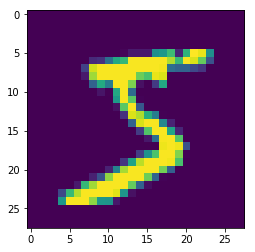

In [30]:
from matplotlib import pyplot as plt
plt.imshow(training_data[0][0].reshape(28,28));

In [34]:
pprint(training_data[0][1])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]])


In [12]:
net.weights[0].shape

(30, 784)

In [14]:
net.biases[0].shape

(30, 1)

In [19]:
from pprint import pprint

In [15]:
net = Network([3, 4, 5, 6])

In [20]:
pprint(net.weights)

[array([[-0.49310119, -1.50289498, -0.36083207],
       [-2.41750556, -0.43937164,  0.03371196],
       [ 1.24173638,  0.72567545,  0.80097609],
       [-0.38548675,  0.06098848, -0.76454081]]),
 array([[-0.72078679,  0.46403272,  1.37073263,  0.60569924],
       [-0.96822171,  2.07752966, -0.33863961, -0.52365017],
       [-0.34577795, -1.26210544, -0.79450236, -0.41160607],
       [-0.94083056,  1.02665623,  0.31295763, -2.55930847],
       [-0.97188711,  0.46333435,  1.56778942,  0.29570556]]),
 array([[-1.79113937,  0.52697216, -0.73807888,  0.47947296, -0.11772486],
       [ 1.87603069,  0.61797662,  0.50939364, -1.32785963, -0.34532834],
       [ 0.03523082, -0.10737696, -1.35098929,  0.02672322, -2.05034323],
       [-0.63732066,  1.63816826,  0.46502243, -0.12089961, -1.3770381 ],
       [-0.435356  ,  0.21443063, -0.37311427,  0.01611287, -1.20959605],
       [ 0.65982309, -0.29154956,  0.82758774, -1.12301993, -0.01966873]])]


In [21]:
pprint(net.biases)

[array([[-2.13368582],
       [-0.84994267],
       [-0.5976637 ],
       [-0.25093928]]),
 array([[ 0.74036197],
       [ 1.05402177],
       [ 0.52282803],
       [ 0.76610627],
       [-0.60146181]]),
 array([[-0.80731207],
       [-0.32177229],
       [-0.70006476],
       [ 0.64809176],
       [ 0.74403349],
       [-0.34931384]])]


# Backpropagation: the big picture

As I've explained it, backpropagation presents two mysteries. First, what's the algorithm really doing? We've developed a picture of the error being backpropagated from the output. But can we go any deeper, and build up more intuition about what is going on when we do all these matrix and vector multiplications? The second mystery is how someone could ever have discovered backpropagation in the first place? It's one thing to follow the steps in an algorithm, or even to follow the proof that the algorithm works. But that doesn't mean you understand the problem so well that you could have discovered the algorithm in the first place. Is there a plausible line of reasoning that could have led you to discover the backpropagation algorithm? In this section I'll address both these mysteries.

To improve our intuition about what the algorithm is doing, let's imagine that we've made a small change $Δw^l_{j,k}$ to some weight in the network, $w^l_{j,k}$:

<img src="asset/2.1/34.png" />

That change in weight will cause a change in the output activation from the corresponding neuron:

<img src="asset/2.1/35.png" />

That, in turn, will cause a change in all the activations in the next layer:

<img src="asset/2.1/36.png" />

Those changes will in turn cause changes in the next layer, and then the next, and so on all the way through to causing a change in the final layer, and then in the cost function:

<img src="asset/2.1/37.png" />

The change ΔC in the cost is related to the change $Δw^l_{j,k}$ in the weight by the equation

<img src="asset/2.1/38.png" />

This suggests that a possible approach to computing ∂C/∂$w^l_{j,k}$ is to carefully track how a small change in $w^l_{j,k}$ propagates to cause a small change in C. If we can do that, being careful to express everything along the way in terms of easily computable quantities, then we should be able to compute ∂C/∂$w^l_{j,k}$.



Let's try to carry this out. The change Δ$w^l_{j,k}$ causes a small change Δ$a^l_{j}$ in the activation of the jth neuron in the lth layer. This change is given by

<img src="asset/2.1/39.png" />

The change in activation Δ$a^l_{j}$ will cause changes in all the activations in the next layer, i.e., the (l+1)th layer. We'll concentrate on the way just a single one of those activations is affected, say $a^(l+1)_{q}$,

<img src="asset/2.1/40.png" />

In fact, it'll cause the following change:

<img src="asset/2.1/41.png" />

Substituting in the expression from Equation (48), we get:

<img src="asset/2.1/42.png" />

Of course, the change Δ$a^(l+1)_{q}$ will, in turn, cause changes in the activations in the next layer. In fact, we can imagine a path all the way through the network from $w^l_{j,k}$ to C, with each change in activation causing a change in the next activation, and, finally, a change in the cost at the output. If the path goes through activations $a^(l)_{j}$,$a^(l+1)_{q}$,…,$a^(L-1)_{n}$, $a^L_{m}$ then the resulting expression is

<img src="asset/2.1/43.png" />

that is, we've picked up a ∂a/∂a type term for each additional neuron we've passed through, as well as the ∂C/∂aLm term at the end. This represents the change in C due to changes in the activations along this particular path through the network. Of course, there's many paths by which a change in wljk can propagate to affect the cost, and we've been considering just a single path. To compute the total change in C it is plausible that we should sum over all the possible paths between the weight and the final cost, i.e.,

<img src="asset/2.1/44.png" />

where we've summed over all possible choices for the intermediate neurons along the path. Comparing with (47) we see that

<img src="asset/2.1/45.png" />

Now, Equation (53) looks complicated. However, it has a nice intuitive interpretation. We're computing the rate of change of C with respect to a weight in the network. What the equation tells us is that every edge between two neurons in the network is associated with a rate factor which is just the partial derivative of one neuron's activation with respect to the other neuron's activation. The edge from the first weight to the first neuron has a rate factor ∂alj/∂wljk. The rate factor for a path is just the product of the rate factors along the path. And the total rate of change ∂C/∂wljk is just the sum of the rate factors of all paths from the initial weight to the final cost. This procedure is illustrated here, for a single path:

<img src="asset/2.1/46.png" />

What I've been providing up to now is a heuristic argument, a way of thinking about what's going on when you perturb a weight in a network. Let me sketch out a line of thinking you could use to further develop this argument. First, you could derive explicit expressions for all the individual partial derivatives in Equation (53). That's easy to do with a bit of calculus. Having done that, you could then try to figure out how to write all the sums over indices as matrix multiplications. This turns out to be tedious, and requires some persistence, but not extraordinary insight. After doing all this, and then simplifying as much as possible, what you discover is that you end up with exactly the backpropagation algorithm! And so you can think of the backpropagation algorithm as providing a way of computing the sum over the rate factor for all these paths. Or, to put it slightly differently, the backpropagation algorithm is a clever way of keeping track of small perturbations to the weights (and biases) as they propagate through the network, reach the output, and then affect the cost.

Now, I'm not going to work through all this here. It's messy and requires considerable care to work through all the details. If you're up for a challenge, you may enjoy attempting it. And even if not, I hope this line of thinking gives you some insight into what backpropagation is accomplishing.

